# Sistema recomendador


In [1]:
#abrimos el archivo, 
import pandas as pd
import numpy as np

dat=pd.read_excel('jester-data-1.xls',header=None,na_values=[99,99.0])
#vemos que la dimensión coincide con lo que el enunciado comenta
print(dat.shape)
dat.head(3)

(24983, 101)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
dat.drop(0,axis=1,inplace=True)

In [3]:
dat.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [4]:
dat.notnull().sum(axis=1).describe(percentiles=np.linspace(0, 1, 11))

count    24983.000000
mean        72.467478
std         21.859600
min         36.000000
0%          36.000000
10%         42.000000
20%         48.000000
30.0%       58.000000
40%         70.000000
50%         72.000000
60.0%       74.000000
70%         95.000000
80%        100.000000
90%        100.000000
100%       100.000000
max        100.000000
dtype: float64

In [5]:
dat.isnull().sum().sum() / dat.shape[0] / dat.shape[1]

0.27532522115038227

In [6]:
dat_sim = dat.notnull().astype('int')
dat_sim.head(2)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [7]:
dat.notnull().sum().sum()/dat.shape[0]/dat.shape[1]

0.7246747788496178

In [8]:
dat.mean(axis=1).head()

0   -3.431892
1    2.746300
2    7.099388
3    2.658125
4    3.252637
dtype: float64

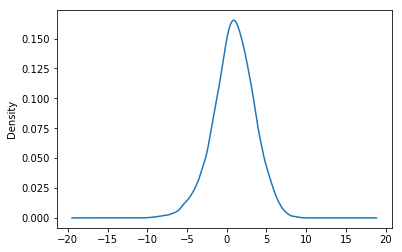

In [9]:
%matplotlib inline
dat.mean(axis=1).plot.kde();

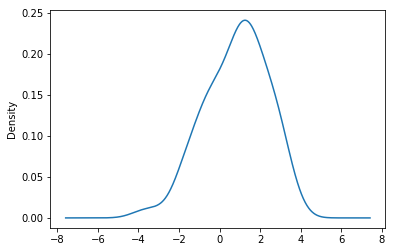

In [10]:
dat.mean(axis=0).plot.kde();

In [11]:
dat.mean(axis=1).shape

(24983,)

In [12]:
dat = (dat.subtract(dat.mean(axis=1), 
                   axis='index').div(dat.std(axis=1)))
dat.fillna(0, inplace=True)
dat.head()

,0,1,2,3,4,5,6,7,8,9,...,24973,24974,24975,24976,24977,24978,24979,24980,24981,24982
0,0.0,-0.898885,3.223562,-1.249259,-1.083980,-1.353026,-1.270445,-1.227540,1.915923,-2.268868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.273203,-0.800834,0.724850,0.372254,-1.696632,-3.109942,-0.664884,-2.038010,2.508342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.638967,0.544117,0.369253,0.547065,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,1.501250,0.000000,0.000000,-0.284010,1.379179,-1.047757,0.895188,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.074900,0.358009,-1.488862,-1.981436,-0.626399,-0.414274,0.724379,0.342099,-1.510083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
dat.shape

(24983, 24983)

In [15]:
from scipy.spatial.distance import jaccard
from sklearn.metrics import jaccard_similarity_score

In [16]:
import numpy as np
a = np.random.randint(0,2,1000)
b = np.random.randint(0,2,1000)

In [18]:
# %timeit jaccard(a,b)

In [19]:
# %timeit jaccard_similarity_score(a,b)

In [20]:
f = lambda x,y:x+y
f(3,5)

8

In [21]:
from functools import partial

g = partial(f,y=2)

In [22]:
g(3)

5

In [24]:
g = partial(jaccard, v=dat_sim.iloc[0])

g(dat_sim.loc[1])

0.26

In [25]:
from functools import partial
from scipy.spatial.distance import jaccard

def JacSim(X,x):    
    g = partial(jaccard, v=x)
    return 1 - X.apply(g, axis=1)

In [26]:
JacSim(dat_sim, dat_sim.loc[0])[:10]

0    1.000000
1    0.740000
2    0.576923
3    0.584416
4    0.793478
5    0.740000
6    0.551282
7    0.740000
8    0.740000
9    0.921053
dtype: float64

In [28]:
from functools import partial
from scipy.spatial.distance import jaccard
from scipy.spatial.distance import cosine

coseno = lambda u,v:np.abs((cosine(u,v)-2)/2)

def CosSim(X,x):
    g = partial(coseno, v=x)
    return X.apply(g, axis=1)    

In [29]:
CosSim(dat, dat.loc[0])[:5]

0    1.000000
1    0.385736
2    0.616058
3    0.814719
4    0.426645
dtype: float64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train , X_test = train_test_split(dat,test_size=0.1,random_state=0)
X_sim_train , X_sim_test = train_test_split(dat_sim,test_size=0.1,random_state=0)

In [32]:
X_train.shape , X_test.shape

((22484, 24983), (2499, 24983))

# Creamos un recomendador basado en clusters

In [23]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

distorsion = []

for k in np.arange(1,15):
    km = KMeans(k,n_jobs=-1,random_state=0)
    distorsion.append(km.fit(X_train).inertia_)

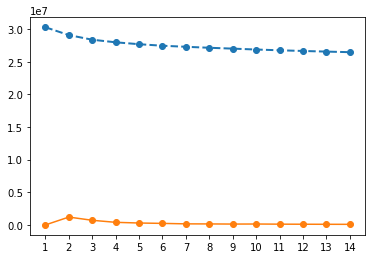

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

diferencias = np.concatenate((np.array([0]),-np.diff(distorsion)))

plt.plot(np.arange(1,15),distorsion,'--o',linewidth=2);
plt.plot(np.arange(1,15),diferencias,'-o')
plt.xticks(np.arange(1,15));

In [25]:
km =  KMeans(5,n_init= 20, max_iter=500,random_state=0,n_jobs=-1)
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=20, n_jobs=-1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [26]:
km.cluster_centers_[4]

array([-1.43120397, -1.00918554, -1.67866418, -3.12121144,  0.470615  ,
        1.65980339, -1.07157077, -1.83876671, -3.7651544 , -1.35238527,
        1.27534824,  1.89126482, -2.67408781,  2.06387275, -3.32885478,
       -5.36282995, -0.81121625, -2.17593643,  0.02516907, -0.92354194,
        3.01763824, -0.29171572, -1.89151979, -4.54536628, -0.54186065,
        1.91309953,  3.92173788,  1.44156921,  3.71695348, -2.0243269 ,
        3.04996265,  3.76581586, -3.32748875,  0.76814682,  3.48395348,
        3.54418054, -4.30511228, -0.31921577,  1.46014125,  0.47549988,
       -2.24216105,  2.68828407, -3.67271869, -5.96874974,  0.29356586,
        1.16621452,  1.68242043,  1.81014843,  3.49132962,  4.21002458,
       -1.16436249, -0.26478699,  3.84822412,  3.61813417, -1.85269718,
        2.1168388 , -5.41811664, -6.36931436, -2.37134731, -3.85014044,
        3.24918283,  3.25624935, -1.01636439, -3.39006896,  3.10069282,
        2.91922182, -3.92718691,  3.07942426,  3.13990072, -0.46

In [48]:
km.predict(X_test.iloc[0,:].values.reshape(1, -1) )

array([2], dtype=int32)

In [28]:
np.argsort(km.cluster_centers_[4])[::-1]

array([49, 26, 52, 31, 28, 53, 35, 48, 34, 61, 60, 68, 64, 67, 30, 20, 65,
       41, 55, 13, 25, 88, 11, 47, 46,  5, 71, 38, 27, 82, 10, 75, 45, 92,
       99, 77, 79, 80, 97, 33, 72, 86, 39,  4, 87, 90, 84, 76, 44, 78, 91,
       96, 95, 18, 81, 83, 89, 51, 21, 37, 74, 69, 94, 24, 98, 70, 93, 16,
       19,  1, 62,  6, 50, 73, 85,  9,  0,  2,  7, 54, 22, 29, 17, 40, 58,
       12,  3, 32, 14, 63, 42,  8, 59, 66, 36, 23, 15, 56, 43, 57])

In [29]:
# np.mean(dat.drop(0,axis=1)).sort_values(ascending=False)

# Creamos la clase sistema recomendador

In [33]:
dat = pd.read_excel('jester-data-1.xls',header=None,na_values=[99,99.0])
dat.drop(0,axis=1,inplace=True)

In [34]:
x = dat.loc[5]

In [46]:
from functools import partial
from scipy.spatial.distance import jaccard

def JacSim(X,x):    
    g = partial(jaccard, v=x)
    return 1 - X.apply(g, axis=1)

In [47]:
from functools import partial
from scipy.spatial.distance import jaccard
from scipy.spatial.distance import cosine

coseno = lambda u,v:np.abs((cosine(u,v)-2)/2)

def CosSim(X,x):
    g = partial(coseno, v=x)
    return X.apply(g, axis=1)  

In [55]:
import pandas as pd
import numpy as np

class Ninja_Rec():
    """hola"""
    
    def __init__(self,dat):
        """ Recibe un dataframe de entrenamiento"""
        self.X_dat = dat.copy()
        self.X_sim = dat.notnull().astype('int')
        self.X = (dat.subtract(dat.mean(axis=1), axis='index')                     
                     .fillna(0))
        
    def __call__(self, k, x, n_recs):
        """recibe k vecinos, una serie x con el mismo índice que las columnas de X,
        n_recs, """
        
        x_sim = x.notnull().astype('int')
        x = (x - x.mean()).fillna(0)
        
        jaccard_ = JacSim(self.X_sim, x_sim)
        cos_ = CosSim(self.X, x)
        
        similarity = (jaccard_ * cos_).sort_values(ascending=False)
        k_souls_index = similarity[similarity<1].index[:k]        
        
        recs = (self.X.loc[k_souls_index, x_sim[x_sim==0].index]
                     .mean()
                     .sort_values(ascending=False))
        
        recs = recs[:n_recs]
        
        return recs

In [56]:
dat.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [57]:
rec = Ninja_Rec(dat)

In [58]:
x = dat.loc[12]

In [59]:
x.isnull().sum()

53

In [60]:
x.head(30)

1      NaN
2      NaN
3      NaN
4      NaN
5     5.87
6      NaN
7     5.58
8     0.53
9      NaN
10    7.14
11    7.04
12     NaN
13    3.74
14    7.04
15   -4.85
16   -4.85
17   -5.34
18    2.04
19    5.58
20    5.58
21    8.01
22     NaN
23   -0.87
24     NaN
25    3.98
26     NaN
27    7.67
28    7.04
29    7.52
30     NaN
Name: 12, dtype: float64

El 72% de la matriz está rellena

In [61]:
dat.notnull().sum().sum() / dat.size

0.7246747788496177

In [64]:
rec(10, x, 12)

26    1.030396
40    0.969460
34    0.863945
22    0.692104
6     0.433073
3     0.358525
55    0.327565
85    0.278976
30    0.277471
41    0.249736
72    0.217806
2     0.163525
dtype: float64

In [65]:
rec(100, x, 10)

26    0.889040
12    0.878409
40    0.465092
22    0.311536
34    0.299500
55    0.215746
89    0.196662
72    0.163229
52    0.109881
6     0.107884
dtype: float64